# K Means Clustering

### Step 1.  Import libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Step 2. Load data

In [24]:
contents = pd.read_csv('HackneyData.csv')

In [41]:
contents.head()
contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 3 columns):
ward      19 non-null object
age       19 non-null float64
income    19 non-null float64
dtypes: float64(2), object(1)
memory usage: 536.0+ bytes


### Step 3. Transform the data for python

In [26]:
contents.columns = ['ward','age','income']

In [27]:
contents.head()

,ward,age,income
0,Brownswood,33.2,"£48,860.00"
1,Cazenove,29.2,"£46,380.00"
2,Chatham,32.1,"£39,570.00"
3,Clissold,33.6,"£56,050.00"
4,Dalston,32.8,"£46,500.00"


In [28]:
contents['income'] = contents['income'].replace('[\£,]','',regex=True).astype(float)

In [29]:
contents.head()

,ward,age,income
0,Brownswood,33.2,48860.0
1,Cazenove,29.2,46380.0
2,Chatham,32.1,39570.0
3,Clissold,33.6,56050.0
4,Dalston,32.8,46500.0


### Step 4. Visualise the data

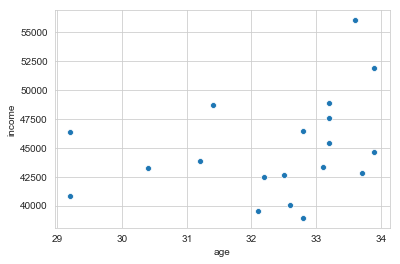

In [34]:
sns.scatterplot(x='age',y='income',data=contents)

### Step 5. Apply K-means clustering

In [48]:
data = []
for index, row in contents.iterrows():
    age = row['age']
    income = row['income']
    data.append([float(age),float(income)])

In [49]:
data

[[33.2, 48860.0],
 [29.2, 46380.0],
 [32.1, 39570.0],
 [33.6, 56050.0],
 [32.8, 46500.0],
 [33.2, 47560.0],
 [33.7, 42840.0],
 [33.1, 43360.0],
 [31.2, 43830.0],
 [32.2, 42490.0],
 [32.8, 38930.0],
 [32.5, 42650.0],
 [31.4, 48700.0],
 [30.4, 43230.0],
 [33.9, 44620.0],
 [29.2, 40810.0],
 [33.9, 51920.0],
 [33.2, 45410.0],
 [32.6, 40010.0]]

In [50]:
from sklearn.cluster import KMeans

In [71]:
km = KMeans(n_clusters=4,verbose=0)

In [72]:
X = contents.drop('ward',axis=1)
y = contents['ward']

In [73]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
contents['cluster'] = km.labels_.astype(int)

### Step 6. Visualise the clusters

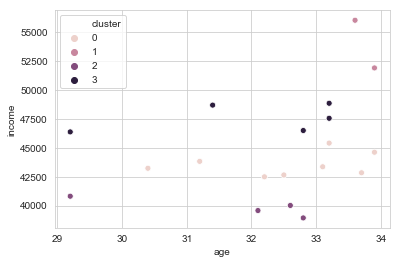

In [76]:
sns.scatterplot(x='age',y='income',hue='cluster',data=contents)

In [77]:
groups = contents.groupby(by='cluster')

# plot the clusters
# cmd forward slash to comment uncomment
# fig, ax = plt.subplots()
for name, group in groups:
    print('---')
    print(group)
    

---
               ward   age   income  cluster
6   Hackney Central  33.7  42840.0        0
7     Hackney Downs  33.1  43360.0        0
8        Haggerston  31.2  43830.0        0
9            Hoxton  32.2  42490.0        0
11        Leabridge  32.5  42650.0        0
13        New River  30.4  43230.0        0
14     Queensbridge  33.9  44620.0        0
17         Victoria  33.2  45410.0        0
---
                       ward   age   income  cluster
3                  Clissold  33.6  56050.0        1
16  Stoke Newington Central  33.9  51920.0        1
---
           ward   age   income  cluster
2       Chatham  32.1  39570.0        2
10  King's Park  32.8  38930.0        2
15  Springfield  29.2  40810.0        2
18         Wick  32.6  40010.0        2
---
           ward   age   income  cluster
0    Brownswood  33.2  48860.0        3
1      Cazenove  29.2  46380.0        3
4       Dalston  32.8  46500.0        3
5   De Beauvoir  33.2  47560.0        3
12     Lordship  31.4  48700.0  

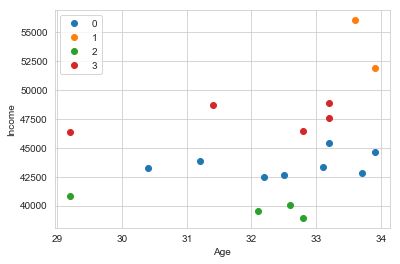

In [78]:
groups = contents.groupby(by='cluster')

# plot the clusters
# cmd forward slash to comment uncomment
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['age'],group['income'],marker='o',ls='',label=name)

plt.xlabel('Age')
plt.ylabel('Income')
ax.legend()

#### Step 7.  Doesn't seem quite right... the data isn't scaled properly!

In [79]:
from sklearn.preprocessing import scale

/Users/agb/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


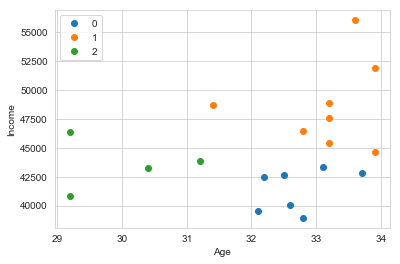

In [84]:
km2 = KMeans(n_clusters=3,verbose=0)
km2.fit(scale(X))
contents['cluster2'] = km2.labels_.astype(int)
groups = contents.groupby(by='cluster2')

# plot the clusters
# cmd forward slash to comment uncomment
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['age'],group['income'],marker='o',ls='',label=name)

plt.xlabel('Age')
plt.ylabel('Income')
ax.legend()

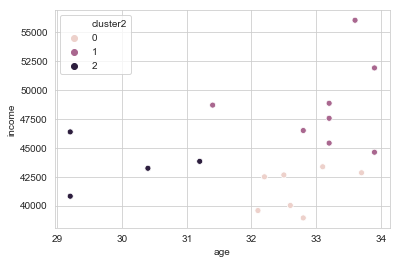

In [85]:
sns.scatterplot(x='age',y='income',data=contents,hue='cluster2')

### Step 8. Use Elbow test to decide number of clusters

In [94]:
num_clusters = list(range(1,10))

In [107]:
kmeans = [KMeans(n_clusters=i) for i in num_clusters]
score = [kmeans[i-1].fit(scale(X)).score(scale(X)) for i in num_clusters]

/Users/agb/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Users/agb/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Users/agb/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Users/agb/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/Users/agb/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function

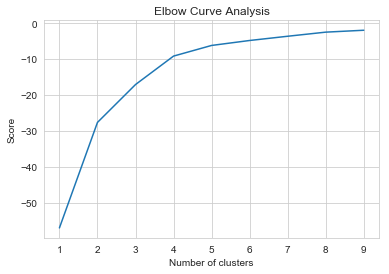

In [109]:
plt.plot(num_clusters,score)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve Analysis')
plt.show()